# Multiclass Classification <a class="anchor" id="reuters-home-anchor"></a>
* [Loading the Data](#reuters-loading-anchor)
* [Manipulating the Data](#reuters-manipulation-anchor)
* [Building the Model](#reuters-build-anchor)
* [Evaluating the Model](#reuters-evaluate-anchor)

In this notebook, we will use the Keras dataset *reuters* for doing a multiclass classification. We will build a neural network model which will do the classification task.
## Loading the Data <a class="anchor" id="reuters-loading-anchor"></a>
[home](#reuters-home-anchor)

The *reuters* dataset consists of 8982 training instances and 2246 testing instances. There are 46 classes, so the labels are numbered from 0 to 45, included. Each sample is a reuters newswire which is converted into a list of integers corresponding to the values in the dictionary called below by the command **reuters.get_word_index()**.

In [45]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [47]:
reuters.get_word_index()

557056/550378 [==============================] - 0s 0us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

## Manipulating the Data  <a class="anchor" id="reuters-manipulation-anchor"></a>
[home](#reuters-home-anchor)

Each sample is a list of integers, but we want to input into the model a matrix, so we will create a function that will combine all samples into a matrix of shape (8982,10000) for the training set and (2246,10000) for the testing set. Each row will correspond to a particular sample. 
We want to vectorize the labels, so we will use the so-called **one-hot-encoding** to transform each label into a vector of lenght 46, consisting of 0s except at the index of the label where we put 1. For maximum readabiltiy, we will write the functions ourselves, but an alternative approach is also proposed.

In [41]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [20]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

y_train = to_one_hot(train_labels)
y_test  = to_one_hot(test_labels)

In [17]:
###---Equivalent to the one-hot-encoding, we programmed ourselves---###

from keras.utils.np_utils import to_categorical 

y_train = to_categorical(train_labels)
y_test  = to_categorical(test_labels)

NameError: name 'to_categotical' is not defined

## Building the Model  <a class="anchor" id="reuters-build-anchor"></a>
[home](#reuters-home-anchor)

Our model will consist of an input layer, an output layer and two hidden layers, one with 64 nodes and one with 46 nodes. If you aren't familiar with the optimizer and the loss function we choose, you can check them online, you will find a definition together with examples and visual explanation. We also want to have *accuracy* as a measure to observe while training.

In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [22]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

We will take 1000 examples from the training set in order to follow the loss and accuracy of the model, while training, on data it hasn't observed.

In [25]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train= y_train[1000:]

The number of epochs and the batch size are hyperparameters, after training and observing the loss and the accuracy of the model, we will change the number of epochs. 

In [26]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 0s 24ms/step - loss: 2.5512 - accuracy: 0.5357 - val_loss: 1.7238 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.3997 - accuracy: 0.7058 - val_loss: 1.3220 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0487 - accuracy: 0.7799 - val_loss: 1.1688 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8300 - accuracy: 0.8220 - val_loss: 1.0428 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6601 - accuracy: 0.8611 - val_loss: 0.9808 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5261 - accuracy: 0.8900 - val_loss: 0.9330 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4274 - accuracy: 0.9121 - val_loss: 0.9258 - val_accuracy: 0.8150
Epoch 8/20
16

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Evaluating the Model  <a class="anchor" id="reuters-evaluate-anchor"></a>
[home](#reuters-home-anchor)

The graphs plotted below are self-explanatory. It is normal for training loss and accuracy to keep increaing since the model gets better and better on information it has already seen, but when it comes to validation data, we see that after approxiamtely 8-9 epochs, the model begins to overfit, so we should retrain the model on 9 epochs as this will be the optimal, given this architecture.

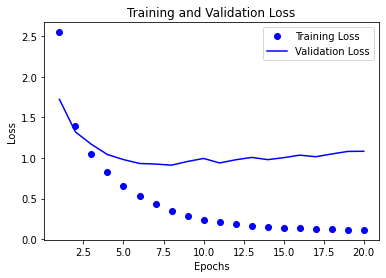

In [33]:
import matplotlib.pyplot as plt

loss_values     = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

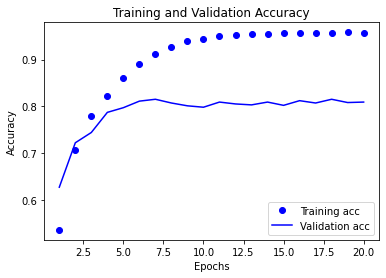

In [36]:
plt.clf()
acc     = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 0s 21ms/step - loss: 2.5518 - accuracy: 0.5170 - val_loss: 1.6971 - val_accuracy: 0.6320
Epoch 2/9
16/16 [==============================] - 0s 14ms/step - loss: 1.4109 - accuracy: 0.7010 - val_loss: 1.3029 - val_accuracy: 0.7050
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 1.0536 - accuracy: 0.7696 - val_loss: 1.1126 - val_accuracy: 0.7510
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 0.8309 - accuracy: 0.8158 - val_loss: 1.0156 - val_accuracy: 0.7720
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.6619 - accuracy: 0.8547 - val_loss: 0.9707 - val_accuracy: 0.7900
Epoch 6/9
16/16 [==============================] - 0s 13ms/step - loss: 0.5283 - accuracy: 0.8870 - val_loss: 0.9276 - val_accuracy: 0.7970
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4189 - accuracy: 0.9132 - val_loss: 0.8737 - val_accuracy: 0.8170
Epoch 8/9
16/16 [===

In [39]:
results = model.evaluate(x_test, y_test)
results

71/71 [==============================] - 0s 3ms/step - loss: 0.9931 - accuracy: 0.7872


[0.9931135177612305, 0.7871772050857544]